In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [2]:
# Define input matrix (5x5) and kernel (3x3)
input_mat = np.array([
    [1,0,1,1,0],
    [0,0,0,1,1],
    [1,0,0,0,1],
    [0,1,1,1,0],
    [1,1,0,1,0]
])
kernel = np.array([
    [1,0,0],
    [0,0,1],
    [1,1,0]
])
print('Input matrix shape:', input_mat.shape)
print('Kernel shape:', kernel.shape)

Input matrix shape: (5, 5)
Kernel shape: (3, 3)


In [4]:
def conv2d(input_arr, kernel, stride=1):
    # valid convolution (no padding)
    in_h, in_w = input_arr.shape
    k_h, k_w = kernel.shape
    out_h = (in_h - k_h)//stride + 1
    out_w = (in_w - k_w)//stride + 1
    out = np.zeros((out_h, out_w), dtype=float)
    for i in range(out_h):
        for j in range(out_w):
            patch = input_arr[i*stride:i*stride + k_h, j*stride:j*stride + k_w]
            out[i,j] = np.sum(patch * kernel)
    return out

# Convolutions for stride 1 and stride 2
conv_s1 = conv2d(input_mat, kernel, stride=1)
conv_s2 = conv2d(input_mat, kernel, stride=2)
print('Conv output (stride=1) shape:', conv_s1.shape)
print(conv_s1)
print('Conv output (stride=2) shape:', conv_s2.shape)
print(conv_s2)

Conv output (stride=1) shape: (3, 3)
[[2. 1. 2.]
 [1. 2. 3.]
 [4. 2. 1.]]
Conv output (stride=2) shape: (2, 2)
[[2. 2.]
 [4. 1.]]


In [5]:
# Pooling functions: pool_size is (h,w) and stride defaults to pool_size
def pool2d(input_arr, pool_size=(2,2), stride=None, mode='max'):
    if stride is None:
        stride = pool_size
    in_h, in_w = input_arr.shape
    p_h, p_w = pool_size
    out_h = (in_h - p_h)//stride[0] + 1
    out_w = (in_w - p_w)//stride[1] + 1
    out = np.zeros((out_h, out_w), dtype=float)
    for i in range(out_h):
        for j in range(out_w):
            patch = input_arr[i*stride[0]:i*stride[0]+p_h, j*stride[1]:j*stride[1]+p_w]
            if mode == 'max':
                out[i,j] = np.max(patch)
            elif mode == 'avg':
                out[i,j] = np.mean(patch)
            elif mode == 'sum':
                out[i,j] = np.sum(patch)
            else:
                raise ValueError('Unknown pooling mode')
    return out

# Apply pooling to both convolution outputs. We'll use pool_size=2 and stride=2 (non-overlapping).
pool_size = (2,2)
conv_s1_max = pool2d(conv_s1, pool_size=pool_size, stride=(2,2), mode='max')
conv_s1_avg = pool2d(conv_s1, pool_size=pool_size, stride=(2,2), mode='avg')
conv_s1_sum = pool2d(conv_s1, pool_size=pool_size, stride=(2,2), mode='sum')

conv_s2_max = pool2d(conv_s2, pool_size=pool_size, stride=(2,2), mode='max')
conv_s2_avg = pool2d(conv_s2, pool_size=pool_size, stride=(2,2), mode='avg')
conv_s2_sum = pool2d(conv_s2, pool_size=pool_size, stride=(2,2), mode='sum')

print('Pooled shapes (stride1 -> max/avg/sum):', conv_s1_max.shape, conv_s1_avg.shape, conv_s1_sum.shape)
print('Pooled shapes (stride2 -> max/avg/sum):', conv_s2_max.shape, conv_s2_avg.shape, conv_s2_sum.shape)

Pooled shapes (stride1 -> max/avg/sum): (1, 1) (1, 1) (1, 1)
Pooled shapes (stride2 -> max/avg/sum): (1, 1) (1, 1) (1, 1)


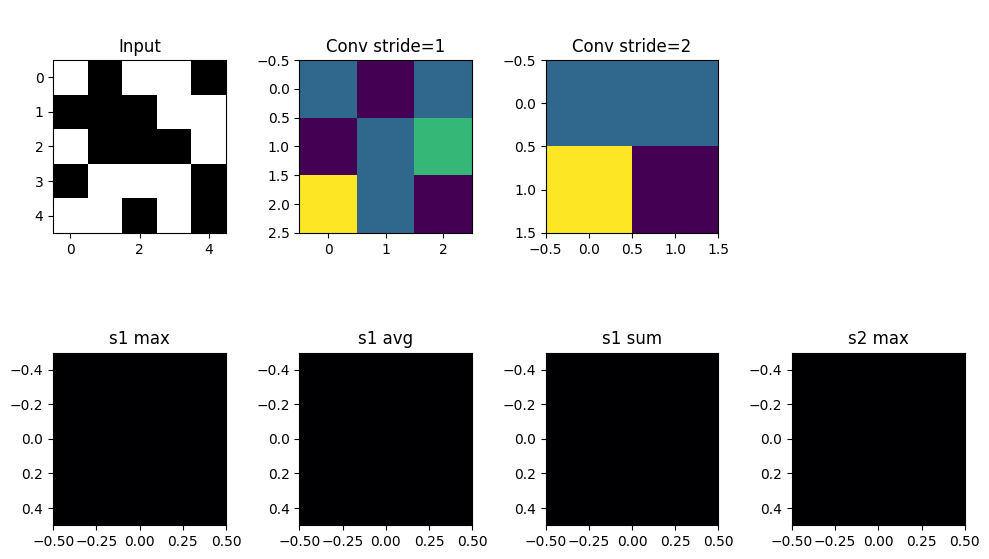

In [6]:
# Visualize convolution outputs and pooled results
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(2,4, width_ratios=[1,1,1,1])
ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(input_mat, cmap='gray')
ax0.set_title('Input')
ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(conv_s1, cmap='viridis')
ax1.set_title('Conv stride=1')
ax2 = fig.add_subplot(gs[0,2])
ax2.imshow(conv_s2, cmap='viridis')
ax2.set_title('Conv stride=2')
ax3 = fig.add_subplot(gs[0,3])
ax3.axis('off')
# pooled maps row
ax4 = fig.add_subplot(gs[1,0])
ax4.imshow(conv_s1_max, cmap='magma')
ax4.set_title('s1 max')
ax5 = fig.add_subplot(gs[1,1])
ax5.imshow(conv_s1_avg, cmap='magma')
ax5.set_title('s1 avg')
ax6 = fig.add_subplot(gs[1,2])
ax6.imshow(conv_s1_sum, cmap='magma')
ax6.set_title('s1 sum')
ax7 = fig.add_subplot(gs[1,3])
ax7.imshow(conv_s2_max, cmap='magma')
ax7.set_title('s2 max')
plt.tight_layout()
plt.show()

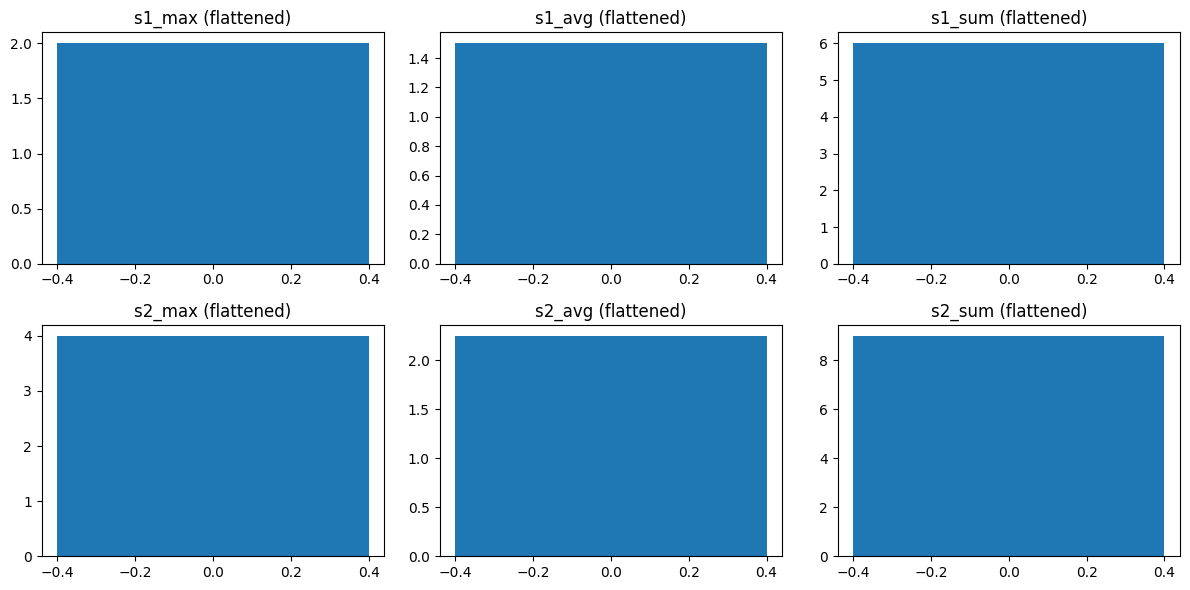

Concatenated flattened vector shape: (6,)


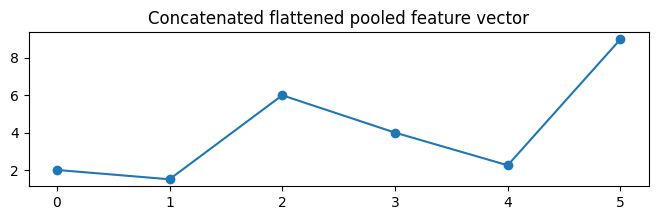

In [7]:
# Flatten pooled feature maps from above and visualize flattened arrays
pooled_list = [
    ('s1_max', conv_s1_max), ('s1_avg', conv_s1_avg), ('s1_sum', conv_s1_sum),
    ('s2_max', conv_s2_max), ('s2_avg', conv_s2_avg), ('s2_sum', conv_s2_sum)
]
flat_arrays = [p.flatten() for _, p in pooled_list]
names = [n for n, _ in pooled_list]
# Plot bar-plots of flattened arrays
fig, axes = plt.subplots(2,3, figsize=(12,6))
for ax, name, arr in zip(axes.flatten(), names, flat_arrays):
    ax.bar(np.arange(len(arr)), arr)
    ax.set_title(name + ' (flattened)')
plt.tight_layout()
plt.show()

# Also show a concatenated flattened vector for one combined feature vector example
concat_flat = np.concatenate(flat_arrays)
print('Concatenated flattened vector shape:', concat_flat.shape)
plt.figure(figsize=(8,2))
plt.plot(concat_flat, marker='o')
plt.title('Concatenated flattened pooled feature vector')
plt.show()

X shape, y shape = (6, 1) (6,)
Initial bias: 1.0
Initial W (first 8 values): [0.04967142]
Final bias: 0.06547654185615996
Final W (first 8 values): [0.98863637]
Final loss: 0.0012690309512612494


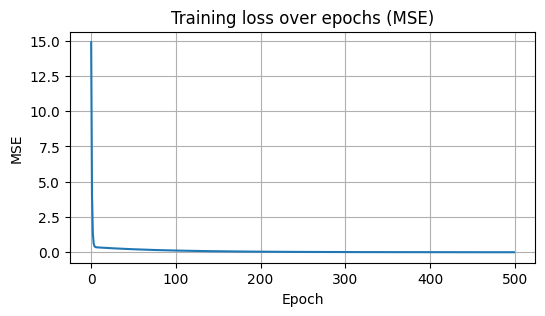

In [8]:
# Learning weights and bias with flattened arrays as samples
# We'll treat each pooled flattened array as one training sample. Target = sum of its elements (a simple scalar target).
X = np.vstack(flat_arrays)  # shape: (n_samples, n_features)
y = X.sum(axis=1)  # target is sum of each flattened vector
n_samples, n_features = X.shape
print('X shape, y shape =', X.shape, y.shape)

# Initialize weights randomly and bias=1 as requested
rng = np.random.RandomState(42)
W = rng.normal(scale=0.1, size=(n_features,))
b = 1.0
lr = 0.01
epochs = 500
loss_hist = []

print('Initial bias:', b)
print('Initial W (first 8 values):', W[:8])

# Simple gradient descent on MSE (batch)
for epoch in range(epochs):
    preds = X.dot(W) + b
    errors = preds - y
    loss = np.mean(errors**2)
    loss_hist.append(loss)
    # gradients
    grad_W = (2.0 / n_samples) * X.T.dot(errors)
    grad_b = (2.0 / n_samples) * errors.sum()
    # update
    W -= lr * grad_W
    b -= lr * grad_b

# Results
print('Final bias:', b)
print('Final W (first 8 values):', W[:8])
print('Final loss:', loss_hist[-1])

plt.figure(figsize=(6,3))
plt.plot(loss_hist)
plt.title('Training loss over epochs (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()